In [11]:
#Trying to see how data looks like / what are its dimensions
import os
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data_dir = '/kaggle/input/deeplense-common-test/dataset'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

In [13]:
classes = ['no', 'sphere', 'vort']

In [14]:
def explore_directory(directory, name="Directory"):
    print(f"\nExploring {name}:")
    total_files = 0
    sample_images = {}
    
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if not os.path.exists(class_dir):
            print(f"  {class_name}: Directory not found")
            continue
        
        npy_files = [f for f in os.listdir(class_dir) if f.endswith('.npy')]
        num_files = len(npy_files)
        total_files += num_files
        print(f"  {class_name}: {num_files} .npy files")
        
        if num_files > 0:
            sample_file = os.path.join(class_dir, npy_files[0])
            sample_image = np.load(sample_file)
            sample_images[class_name] = sample_image
            print(f"=> Sample shape for {class_name}: {sample_image.shape}")
            print(f"=> Sample min/max: {sample_image.min():.4f}, {sample_image.max():.4f}")
            print(f"=> Sample dtype: {sample_image.dtype}")
    
    print(f"Total files in {name}: {total_files}")
    return sample_images

In [15]:
train_samples = explore_directory(train_dir, "Train")
val_samples = explore_directory(val_dir, "Validation")


Exploring Train:
  no: 10000 .npy files
=> Sample shape for no: (1, 150, 150)
=> Sample min/max: 0.0000, 1.0000
=> Sample dtype: float64
  sphere: 10000 .npy files
=> Sample shape for sphere: (1, 150, 150)
=> Sample min/max: 0.0000, 1.0000
=> Sample dtype: float64
  vort: 10000 .npy files
=> Sample shape for vort: (1, 150, 150)
=> Sample min/max: 0.0000, 1.0000
=> Sample dtype: float64
Total files in Train: 30000

Exploring Validation:
  no: 2500 .npy files
=> Sample shape for no: (1, 150, 150)
=> Sample min/max: 0.0000, 1.0000
=> Sample dtype: float64
  sphere: 2500 .npy files
=> Sample shape for sphere: (1, 150, 150)
=> Sample min/max: 0.0000, 1.0000
=> Sample dtype: float64
  vort: 2500 .npy files
=> Sample shape for vort: (1, 150, 150)
=> Sample min/max: 0.0000, 1.0000
=> Sample dtype: float64
Total files in Validation: 7500


In [16]:
def visualize_sample(image, class_name):
    print(f"\nVisualizing sample from {class_name}:")
    # Shape is (1, 150, 150), remove channel dimension for display
    img = image[0]  
    plt.figure()
    plt.imshow(img, cmap='gray')  
    plt.title(f"Sample from {class_name}")
    plt.axis('off')
    plt.show()


Visualizing sample from no:


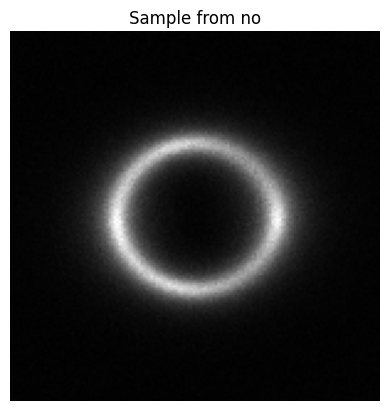


Visualizing sample from sphere:


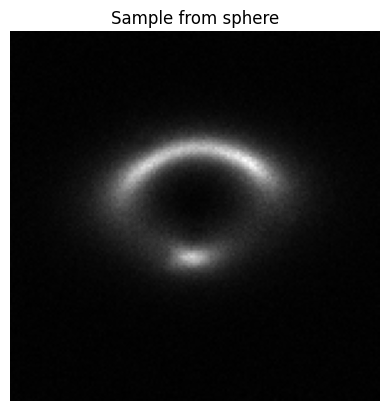


Visualizing sample from vort:


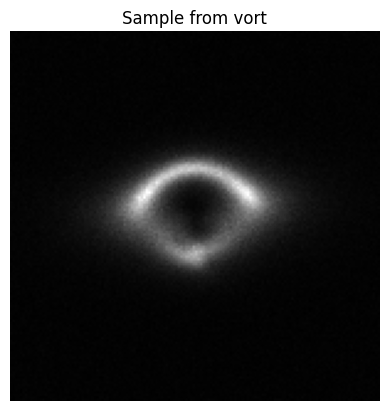

In [17]:
for class_name, image in train_samples.items():
    visualize_sample(image, class_name)